## Stock Analysis Project
#### Exploratory Data Analysis of Stock Prices
#### Notebook 1

This project explores the price behavior, trends, volatility, and moving average of four popular publicly-traded stocks in comparison with the overall market. Stock prices can be considered an example of time series data, which is data dependent on the time of each observation. Traders conduct buying and selling strategies by analyzing various metrics. This first notebook gives an overview of several stocks using exploratory data analysis, several performance metrics, and moving average. The second notebook to follow will focus more on prediction of future prices using regression and machine learning.
<br>
<br>
The stocks analyzed:
    - Netflix
    - Disney
    - Tesla
    - Qualcomm
    - SPY ETF (proxy for S&P 500)

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start = datetime.datetime(2017, 1, 1) # call start time
end = datetime.datetime(2018, 3, 27)  # call end time

In [4]:
NFLX = data.DataReader('NFLX', 'quandl', start, end, access_key = 'ViMdNoRSnDFpdFoVvJWR') 
DIS = data.DataReader('DIS', 'quandl', start, end, access_key = 'ViMdNoRSnDFpdFoVvJWR') 
TSLA = data.DataReader('TSLA', 'quandl', start, end, access_key = 'ViMdNoRSnDFpdFoVvJWR') 
AMZN = data.DataReader('AMZN', 'quandl', start, end, access_key = 'ViMdNoRSnDFpdFoVvJWR') 
QCOM = data.DataReader('QCOM', 'quandl', start, end, access_key = 'ViMdNoRSnDFpdFoVvJWR') 

In [5]:
tickers = ['AMZN', 'DIS', 'NFLX', 'TSLA', 'QCOM', 'SPY']

In [6]:
spy = pd.read_csv("spy.csv")    
spy = pd.DataFrame(spy.loc[:, ["open", "high", "low", "close", "close"]].iloc[1:].as_matrix(),
                         index=pd.DatetimeIndex(spy.iloc[1:, 0]),
                         columns=["Open", "High", "Low", "Close", "AdjClose"]).sort_index()
SPY = spy.loc[start:end]
SPY.index.names = ['Date']
SPY.head()

C:\Users\erica\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,Open,High,Low,Close,AdjClose
Date,,,,,
2017-01-03,225.04,225.8300,223.8837,225.24,225.24
2017-01-04,225.62,226.7500,225.6100,226.58,226.58
2017-01-05,226.27,226.5800,225.4800,226.40,226.40
2017-01-06,226.53,227.7500,225.9000,227.21,227.21
2017-01-09,226.91,227.0701,226.4163,226.46,226.46


In [7]:
# combine all stocks to one data frame
df = pd.concat([AMZN,DIS,NFLX,TSLA,QCOM,SPY], axis = 1, keys = tickers)

In [8]:
df = df.sort_values(by='Date',ascending=True)

In [9]:
# Rename columns
df.columns.names = ['Stock Symbol', 'Stock Info']

In [10]:
df.head()

Stock Symbol    AMZN                                                    \
Stock Info      Open      High       Low   Close     Volume ExDividend   
Date                                                                     
2017-01-03    757.92  758.7595  747.7000  753.67  3521066.0        0.0   
2017-01-04    758.39  759.6800  754.2000  757.18  2510526.0        0.0   
2017-01-05    761.55  782.3999  760.2557  780.45  5830068.0        0.0   
2017-01-06    782.36  799.4400  778.4800  795.99  5986234.0        0.0   
2017-01-09    798.00  801.7742  791.7700  796.92  3446109.0        0.0   

Stock Symbol                                         ...       QCOM  \
Stock Info   SplitRatio AdjOpen   AdjHigh    AdjLow  ...    AdjOpen   
Date                                                 ...              
2017-01-03          1.0  757.92  758.7595  747.7000  ...  63.378739   
2017-01-04          1.0  758.39  759.6800  754.2000  ...  63.195897   
2017-01-05          1.0  761.55  782.3999  760.2557  ...  62.753227   
2017-01-06          1.0  782.36  799.4400  778.4800  ...  63.013055   
2017-01-09          1.0  798.00  801.7742  791.7700  ...  63.061171   

Stock Symbol                                                 SPY            \
Stock Info      AdjHigh     AdjLow   AdjClose  AdjVolume    Open      High   
Date                                                                         
2017-01-03    63.648190  62.167171  62.936069  9519838.0  225.04  225.8300   
2017-01-04    63.465348  62.801343  63.003432  6221655.0  225.62  226.7500   
2017-01-05    63.490753  62.599255  63.080418  5998898.0  226.27  226.5800   
2017-01-06    63.388362  62.416510  63.061171  6749352.0  226.53  227.7500   
2017-01-09    63.768480  63.022678  63.176650  4769160.0  226.91  227.0701   

Stock Symbol                             
Stock Info         Low   Close AdjClose  
Date                                     
2017-01-03    223.8837  225.24   225.24  
2017-01-04    225.6100  226.58   226.58  
2017-01-05    225.4800  226.40   226.40  
2017-01-06    225.9000  227.21   227.21  
2017-01-09    226.4163  226.46   226.46  

[5 rows x 65 columns]

## Exploratory Data Analysis

#### What's the max close price of each stock throughout the period?

In [11]:
# Use cross section method .xs()
df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Stock Symbol
AMZN    1598.39
DIS      115.84
NFLX     331.44
TSLA     385.00
QCOM      68.91
SPY      286.58
dtype: float64

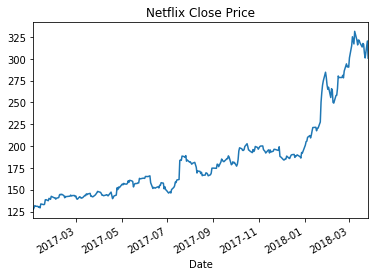

In [12]:
NFLX['AdjClose'].plot(title='Netflix Close Price')

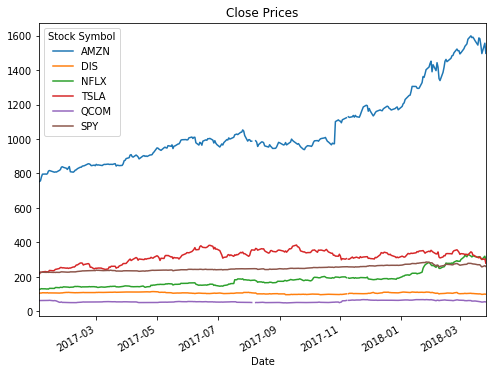

In [13]:
df.xs(key = 'AdjClose', axis = 1, level = 'Stock Info').plot(figsize=(8,6), title = 'Close Prices')

Amazon has the highest close price. Since its price is much higher than the rest of the stocks, it's harder to compare the stocks' changes to each other and we should using a different metric.

#### What are the returns for each stock?

One way to calculate return is dividing the adjusted close price of each day by the initial close price. 

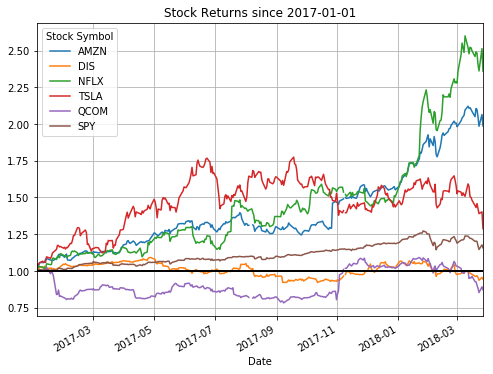

In [14]:
stock_return = df.apply(lambda x: x / x[0])
stock_return = stock_return.xs(key = 'AdjClose', axis = 1, level = 'Stock Info')
stock_return.plot(grid = True, title = 'Stock Returns since 2017-01-01', figsize=(8,6)).axhline(y = 1, color = "black", lw = 2)

We can compare the performance of each stock return with the performance of the overall market, represented by the light blue SPY stock return. SPY is an Exchange Traded Fund of the S&P top 500 companies, and so SPY can be a proxy for how the market performs as a whole.

In [15]:
# Compare these stocks with the S&P 500, using the SPY ETF as a proxy
spy = pd.read_csv("spy.csv")    
spy = pd.DataFrame(spy.loc[:, ["open", "high", "low", "close", "close"]].iloc[1:].as_matrix(),
                         index=pd.DatetimeIndex(spy.iloc[1:, 0]),
                         columns=["Open", "High", "Low", "Close", "AdjClose"]).sort_index()
 
spy = spy.loc[start:end]
spy.head()
#df2 = df.join(spy.loc[:, "Adj Close"]).rename(columns={"Adj Close": "SPY"})


C:\Users\erica\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,AdjClose
date,,,,,
2017-01-03,225.04,225.8300,223.8837,225.24,225.24
2017-01-04,225.62,226.7500,225.6100,226.58,226.58
2017-01-05,226.27,226.5800,225.4800,226.40,226.40
2017-01-06,226.53,227.7500,225.9000,227.21,227.21
2017-01-09,226.91,227.0701,226.4163,226.46,226.46


In [16]:
# create new df for daily returns
returns = pd.DataFrame()
# use Panda's percent change method to calculate return for each stock
for t in tickers:
    returns[t + ' return'] = df[t]['Close'].pct_change()

In [17]:
returns.head()

,AMZN return,DIS return,NFLX return,TSLA return,QCOM return,SPY return
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.004657,0.012821,0.015060,0.046085,0.001070,0.005949
2017-01-05,0.030732,-0.000558,0.018546,-0.001057,0.001222,-0.000794
2017-01-06,0.019912,0.014900,-0.005614,0.009967,-0.000305,0.003578
2017-01-09,0.001168,-0.005689,-0.000916,0.009912,0.001831,-0.003301


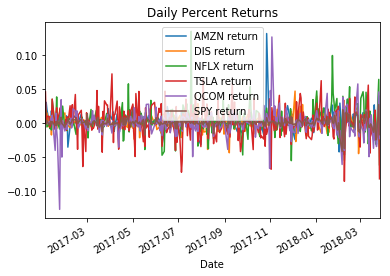

In [18]:
returns.plot(title='Daily Percent Returns')

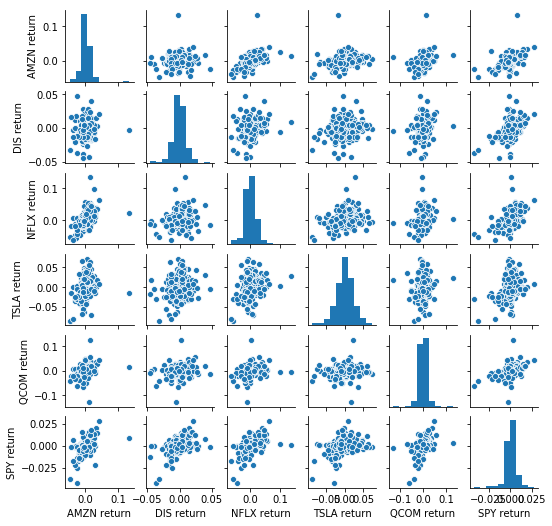

In [19]:
g = sns.pairplot(returns[1:])
g.fig.set_size_inches(7,7)

In [20]:
returns.idxmin() # when was the date for each of the stocks' minimum values?

AMZN return   2018-02-08
DIS return    2018-02-27
NFLX return   2018-03-27
TSLA return   2018-02-08
QCOM return   2017-01-23
SPY return    2018-02-05
dtype: datetime64[ns]

Did the market have a bad day around February 2018? Several of the stocks' lowest prices were during that period.

C:\Users\erica\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\erica\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\erica\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\erica\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribution of Qualcomm Returns in 2017')

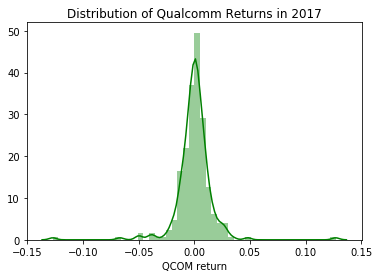

In [21]:
qcom = sns.distplot(returns.loc['2017-01-01':'2017-12-31']['QCOM return'], color='green',
            bins=50)
qcom.set_title('Distribution of Qualcomm Returns in 2017')

Text(0.5, 1.0, 'Distribution of Tesla Returns in 2017')

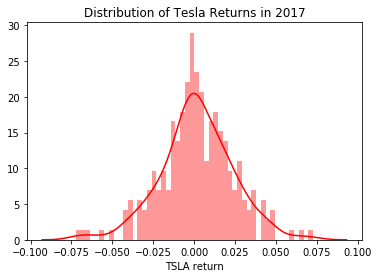

In [22]:
tsla = sns.distplot(returns.loc['2017-01-01':'2017-12-31']['TSLA return'], color='red',
            bins=50)
tsla.set_title('Distribution of Tesla Returns in 2017')

Tesla is a more volatile stock than Qualcomm, as shown by the wider distribution.

## Candlestick chart Using Plotly Package

A candlestick chart can represent a stock's open, close, high, and low prices for the day. The length of the candlestick shows how much the price fluctuated during the day. If a candle is green, the close was higher than the open. If the candle is red, the close was lower than the open. Patterns can be separated into bullish, if the price is likely to rise, or bearish trends, if the price is likely to fall.

In [23]:
import plotly
plotly.tools.set_credentials_file(username='katmoon', api_key='F8TEoxisz0s1RHyD0b3M')

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

trace = go.Candlestick(x=SPY.index,
                open=SPY['Open'],
                high=SPY['High'],
                low=SPY['Low'],
                close=SPY['Close'])
data = [trace]
layout = go.Layout(
    title=go.layout.Title(
        text='Monthly Stock Prices of S&P 500',
        xref='paper',
        x=0
    ))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='spy_candlestick')

C:\Users\erica\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Measures of Risk
We can define riskiness as how likely a stock is to lose money. Measuring risk can help traders reduce risk through employing various strategies. Let's calculate some metrics about our stocks that can give us more information about each stock's price behavior and stocks' riskiness. Examples include the average return and returns' standard deviation (aka the volatility). 

### What's the average yearly return? 

In [29]:
returns.mean(axis=0)

AMZN return    0.002325
DIS return    -0.000154
NFLX return    0.002986
TSLA return    0.001083
QCOM return   -0.000404
SPY return     0.000495
dtype: float64

### What's the volatility? 

In [31]:
returns.std(axis=0)

AMZN return    0.014377
DIS return     0.010746
NFLX return    0.020465
TSLA return    0.023102
QCOM return    0.018158
SPY return     0.006725
dtype: float64

The higher the standard deviation, the higher the risk of a stock. Looking at each stock returns' standard deviations, SPY seems to be the least volatile, while stocks like TSLA are the most volatile.

### Alpha and Beta
We can also calculate alpha and beta values for each stock, which can also measure risk. 
<br>
<br>
Alpha is the average excess return on a stock relative to the return on the market using a benchmark index, such as the S&P 500. If alpha is negative, the stock was too risky relative to its return. 
<br>
<br>

Beta measures relative volatility, comparing the riskiness of a stock to the whole market. The higher the beta, the greater the magnitude the stock's price moves compared to the fluctuations of the market.
<br>
<br>
Given sample means, sample correlation, and sample standard deviations, alpha and beta can be calculated as follows:
<br>
<br>
\begin{align}
\alpha & = \bar{y} - \beta\bar{x} \\
\beta & = r\frac{s_y}{s_x}
\end{align}

In [67]:
# US Treasury Bills
import quandl
tb = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
tb_returns = tb.pct_change()
tb_returns.head()

,Value
Date,
2017-01-01,NaN
2017-02-01,0.019608
2017-03-01,0.423077
2017-04-01,0.081081
2017-05-01,0.112500


Text(0, 0.5, 'Return')

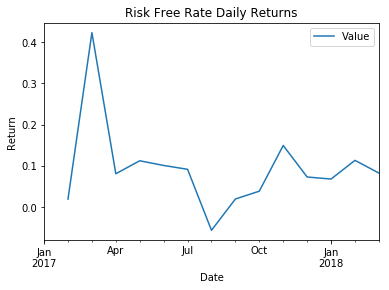

In [87]:
t = tb_returns.plot()
t.set_title("Risk Free Rate Daily Returns")
plt.ylabel("Return")

The risk free rate measures how much an investment would return if there were no risk, such as buying and holding a US Treasury Bill.`

In [72]:
# get the risk free rate
r = tb_returns.iloc[-1, 0]    # last and most recent Treasury Bill rate
r

0.08280254777070062

In [47]:
returns.head()

,AMZN return,DIS return,NFLX return,TSLA return,QCOM return,SPY return
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.004657,0.012821,0.015060,0.046085,0.001070,0.005949
2017-01-05,0.030732,-0.000558,0.018546,-0.001057,0.001222,-0.000794
2017-01-06,0.019912,0.014900,-0.005614,0.009967,-0.000305,0.003578
2017-01-09,0.001168,-0.005689,-0.000916,0.009912,0.001831,-0.003301


In [50]:
smcorr = returns.drop("SPY return", 1).corrwith(returns["SPY return"])    # calculate how much each stock is correlated wit the market
smcorr

AMZN return    0.491997
DIS return     0.473861
NFLX return    0.508118
TSLA return    0.346602
QCOM return    0.470203
dtype: float64

In [73]:
sy = returns.drop("SPY return",1).std(axis=0)
sx = returns["SPY return"].std(axis=0)
ybar = returns.drop("SPY return", 1).mean() - r
xbar = returns["SPY return"].mean(axis=0) - r

In [76]:
beta = smcorr * sy/sx
alpha = ybar - beta*xbar


In [81]:
print("Beta Values")
beta

Beta Values


AMZN return    1.051892
DIS return     0.757216
NFLX return    1.546351
TSLA return    1.190734
QCOM return    1.269669
dtype: float64

In [82]:
print("Alpha Values")
alpha

Alpha Values


AMZN return    0.006101
DIS return    -0.020632
NFLX return    0.047460
TSLA return    0.016287
QCOM return    0.021297
dtype: float64

Based on the alpha and beta values, we can see the volatility of each stock in more detail. Netflix has the greatest beta and alpha value, indicating it is the most volatile of the stocks relative to the market but also had the greatest relative returns.

### Moving Average

Moving averages take the average of each stock's prices over q number of days (eg: 20-day MA, 30-day MA, 50-day MA,..). They help smooth a price series and can help in identifying trends. Trades can predict the bullish or bearish behavior of a stock by the trends in its MA.

In [97]:
NFLX['20d'] = np.round(NFLX["AdjClose"].rolling(window = 20).mean(), 2)
NFLX['30d'] = np.round(NFLX["AdjClose"].rolling(window = 30).mean(), 2)
NFLX['100d'] = np.round(NFLX["AdjClose"].rolling(window = 100).mean(), 2)
NFLX.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,20d,30d,100d
Date,,,,,,,,,,,,,,,
2018-03-27,322.49,322.90,297.00,300.69,11890994.0,0.0,1.0,322.49,322.90,297.00,300.69,11890994.0,NaN,NaN,NaN
2018-03-26,309.36,321.03,302.00,320.35,11906279.0,0.0,1.0,309.36,321.03,302.00,320.35,11906279.0,NaN,NaN,NaN
2018-03-23,307.41,310.73,300.36,300.94,9226978.0,0.0,1.0,307.41,310.73,300.36,300.94,9226978.0,NaN,NaN,NaN


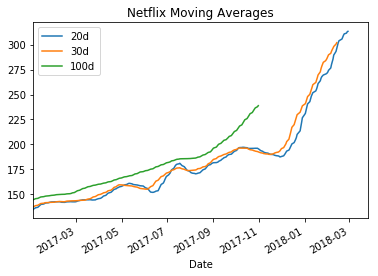

In [108]:
NFLX['20d'].plot()
NFLX['30d'].plot()
NFLX['100d'].plot()
plt.title('Netflix Moving Averages')
plt.legend()

In [102]:
trace = go.Candlestick(x=NFLX.index,
                open=NFLX['AdjOpen'],
                high=NFLX['AdjHigh'],
                low=NFLX['AdjLow'],
                close=NFLX['AdjClose'],
)
data = [trace]
layout = go.Layout(
    title=go.layout.Title(
        text='Netflix Stock Prices',
        xref='paper',
        x=0
    ))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='spy_candlestick')

C:\Users\erica\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



##### Notebook 2 will focus on prediction and machine learning using the following methods:
    - Moving Average
    - Linear Regression
    - k-Nearest Neighbors
    - LSTM Network